# Linear Regression

# Formula -
<img src="https://www.alpharithms.com/wp-content/uploads/1156/slope-intercept-vs-linear-regression-equations.jpg" width="700"><br>
#### where -
##### Y – Representing the dependent variable, not its value. Comparable to the term in slope-intercept form.
##### ß0 – The constant coefficient representing the y-intercept where an observed value of X is equal to zero. i.e. y = 0. Comparable to the b term in slope-intercept.<br>
##### ß1 – A coefficient representing the slope of the regression line; comparable to the m term in slope-intercept.
##### X – Representing the independent variable, not its value. Comparable to the term in slope-intercept form.
##### ε – Representing the residual (error) term describing how far away a predicted value is from an observed value. Not represented in slope-intercept form.

<img src="https://www.alpharithms.com/wp-content/uploads/1156/estimated-slope-formula-simple-linear-regression.jpg" width="500">

<img src="https://www.alpharithms.com/wp-content/uploads/1156/simple-linear-regression-intercept-estimator-beta0.jpg" width="500">

<img src="https://www.alpharithms.com/wp-content/uploads/1156/simple-linear-regression-estimated-residual.jpg" width="500">


In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
class LinearRegression:

    def __init__(self):
        self.b1 = None
        self.b0 = None
        self.m_curr = self.c_curr = 0

    def fit(self,x,y):
        num = 0
        den = 0
        for i in range(len(x)):
            num += (x[i]-x.mean())*(y[i]-y.mean())
            den += (x[i]-x.mean())**2
        self.b1 = num/den
        self.b0 = y.mean() - (self.b1 * x.mean())

    def gradient_descent(self,x,y):
        rate = 0.01
        n=len(x)
        plt.scatter(x,y)
        for i in range(pow(10,4)):
            y_pred = self.m_curr*x+self.c_curr
            plt.plot(x,y_pred)
            md = -(2/n)*sum(x*(y-y_pred))
            cd = -(2/n)*sum(y-y_pred)
            self.m_curr -= rate*md
            self.c_curr -= rate*cd

    def plot(self,x,y):
        rate = 0.01
        n=len(x)
        plt.scatter(x,y)
        for i in range(pow(10,4)):
            y_pred = self.m_curr*x+self.c_curr
            md = -(2/n)*sum(x*(y-y_pred))
            cd = -(2/n)*sum(y-y_pred)
            self.m_curr -= rate*md
            self.c_curr -= rate*cd
        plt.plot(x,y_pred)
    
    def slope(self):
        return self.b1
    
    def intersect(self):
        return self.b0

    def predict(self,x):
        arr = []
        for i in x:
            arr.append(round((self.b1*i + self.b0),2))
        
        return np.array(arr)
    

## Test 1

In [209]:
df = pd.read_csv("train.csv")
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
995,71.0,68.545888
996,46.0,47.334876
997,55.0,54.090637
998,62.0,63.297171


In [210]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values
for i in range(len(y)):
    y[i] = round(y[i],3)


In [211]:
x

array([2.40000000e+01, 5.00000000e+01, 1.50000000e+01, 3.80000000e+01,
       8.70000000e+01, 3.60000000e+01, 1.20000000e+01, 8.10000000e+01,
       2.50000000e+01, 5.00000000e+00, 1.60000000e+01, 1.60000000e+01,
       2.40000000e+01, 3.90000000e+01, 5.40000000e+01, 6.00000000e+01,
       2.60000000e+01, 7.30000000e+01, 2.90000000e+01, 3.10000000e+01,
       6.80000000e+01, 8.70000000e+01, 5.80000000e+01, 5.40000000e+01,
       8.40000000e+01, 5.80000000e+01, 4.90000000e+01, 2.00000000e+01,
       9.00000000e+01, 4.80000000e+01, 4.00000000e+00, 2.50000000e+01,
       4.20000000e+01, 0.00000000e+00, 6.00000000e+01, 9.30000000e+01,
       3.90000000e+01, 7.00000000e+00, 2.10000000e+01, 6.80000000e+01,
       8.40000000e+01, 0.00000000e+00, 5.80000000e+01, 1.90000000e+01,
       3.60000000e+01, 1.90000000e+01, 5.90000000e+01, 5.10000000e+01,
       1.90000000e+01, 3.30000000e+01, 8.50000000e+01, 4.40000000e+01,
       5.00000000e+00, 5.90000000e+01, 1.40000000e+01, 9.00000000e+00,
      

In [212]:
y

array([ 21.549,  47.464,  17.219,  36.586,  87.289,  32.464,  10.781,
        80.763,  24.612,   6.963,  11.238,  13.533,  24.603,  39.4  ,
        48.438,  61.699,  26.928,  70.405,  29.341,  25.309,  69.029,
        84.995,  57.043,  50.592,  83.028,  57.058,  47.959,  24.342,
        94.685,  48.04 ,   7.081,  21.992,  42.332,   0.329,  61.923,
        91.177,  39.454,   5.996,  22.59 ,  61.18 ,  85.028,  -1.286,
        61.943,  21.96 ,  33.662,  17.609,  58.563,  52.824,  22.136,
        35.075,  86.188,  42.632,   4.098,  61.223,  17.707,  11.853,
        80.231,  62.649,   9.617,  20.028,  61.751,  71.61 ,  23.772,
        51.901,  22.661,  50.029,  26.688,   0.377,   6.806,  77.34 ,
        28.903,  66.735,   0.708,  57.077,  28.415,  44.463,   7.46 ,
         2.317,   4.929,  52.503,  91.191,   8.489,   6.963,  31.98 ,
        81.428,  22.624,  78.525,  25.807,  73.511,  91.775,  49.219,
        80.504,  50.056,  25.463,  55.322,  59.124,   1.101,  71.98 ,
        30.137,  83.

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [214]:
X_train

array([ 56.,  13.,  43.,  56.,  42.,  58.,  16.,  15.,  37.,  99.,  91.,
        15.,  10.,  65.,  25.,  91.,   0.,  46.,  39.,  77.,   6.,  84.,
        91.,  37.,  72.,  88.,  21.,  29.,  96.,  64.,  35.,   4.,  37.,
        21.,  15.,  58.,  95.,  62.,  30.,  17.,  65.,  44.,  33.,  97.,
        49.,  44.,  70.,  71.,  97.,  55.,  61.,  28.,  19.,  17.,  33.,
        14.,  87.,  93.,  71.,  90.,  93.,  23.,  68.,   4.,  16.,  92.,
        43.,  14.,  51.,  87.,  52.,  60.,  77.,  86.,  87.,   4.,  26.,
        58.,   3.,  81.,  47.,  21.,  74.,  39.,   7.,  70.,  82.,  81.,
        54.,  39.,  76.,  75.,  58.,  46.,  98.,  61.,  90.,  54.,  14.,
        24.,  53.,  88.,  41.,  73.,   7.,  79.,  22.,   7.,  21.,   8.,
        69.,  93.,  30.,  61.,   5.,  15.,  90.,  47.,  89.,  24.,  74.,
        91.,  45.,  71.,  24.,  91.,  72.,  52.,  42.,  90.,   3.,  44.,
        31.,  21.,  27.,  75.,  58.,  93.,  54.,  38.,   9.,  13.,  19.,
        48.,  65.,  66.,  86.,  63.,  54.,  69.,  8

In [215]:
Y_train

array([ 59.244,   9.744,  45.124,  61.094,  43.274,  56.687,  14.002,
         9.291,  41.144,  99.874,  91.647,   9.805,  13.934,  60.533,
        21.323,  94.923,  -3.468,  49.835,  39.896,  80.504,   2.577,
        83.506,  89.74 ,  34.593,  77.997,  88.058,  23.772,  29.341,
        94.791,  67.681,  34.311,   5.608,  37.694,  19.852,  11.88 ,
        57.043,  97.667,  58.875,  28.998,  20.107,  58.373,  42.943,
        36.346,  94.975,  56.159,  37.085,  73.685,  68.921,  98.52 ,
        55.359,  60.023,  30.232,  19.388,  19.305,  33.22 ,  16.635,
        85.593,  92.012,  67.921,  91.191,  94.625,  18.314,  67.287,
         7.081,  11.238,  89.732,  40.832,  13.84 ,  53.267,  87.006,
        54.082,  53.651,  76.245,  85.033,  87.289,   2.811,  23.876,
        59.464,  -2.236,  78.203,  44.15 ,  23.177,  75.726,  47.494,
         9.282,  71.143,  86.79 ,  81.29 ,  52.451,  39.4  ,  75.633,
        73.23 ,  54.147,  52.055,  98.504,  60.071,  94.797,  54.576,
        10.582,  22.

In [216]:
lr = LinearRegression()

/tmp/ipykernel_43476/211276181.py:24: RuntimeWarning: overflow encountered in double_scalars
  md = -(2/n)*sum(x*(y-y_pred))
/tmp/ipykernel_43476/211276181.py:22: RuntimeWarning: invalid value encountered in multiply
  y_pred = self.m_curr*x+self.c_curr


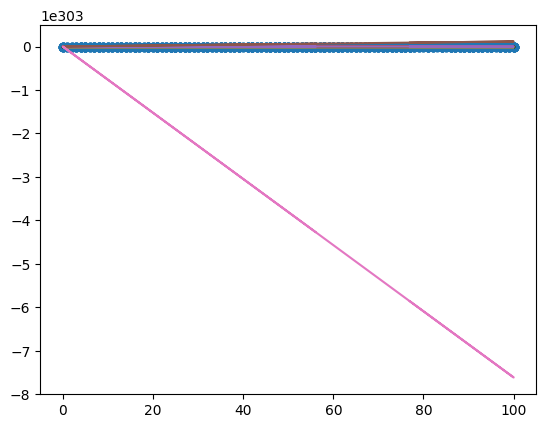

In [217]:
lr.gradient_descent(X_train,Y_train)

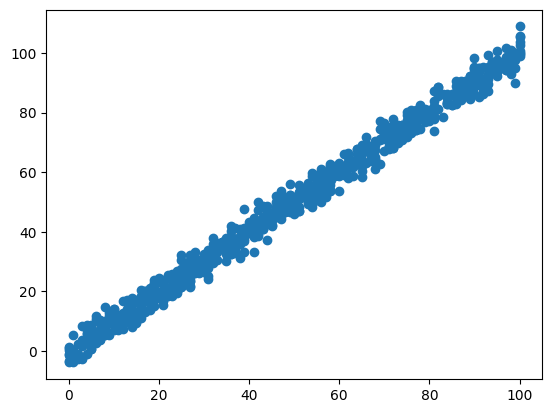

In [218]:
lr.plot(X_train,Y_train)

In [219]:
lr.fit(X_train,Y_train)

In [220]:
X_test

array([7.00000000e+00, 7.90000000e+01, 9.90000000e+01, 5.50000000e+01,
       9.60000000e+01, 1.50000000e+01, 3.40000000e+01, 7.20000000e+01,
       1.70000000e+01, 5.00000000e+01, 2.10000000e+01, 6.50000000e+01,
       4.30000000e+01, 5.90000000e+01, 4.20000000e+01, 8.50000000e+01,
       6.90000000e+01, 3.00000000e+01, 2.00000000e+01, 6.40000000e+01,
       3.53015737e+03, 0.00000000e+00, 9.90000000e+01, 8.10000000e+01,
       2.40000000e+01, 1.00000000e+00, 9.90000000e+01, 5.20000000e+01,
       8.60000000e+01, 1.30000000e+01, 4.70000000e+01, 5.30000000e+01,
       5.00000000e+01, 4.00000000e+01, 2.00000000e+00, 9.40000000e+01,
       6.80000000e+01, 7.20000000e+01, 8.00000000e+00, 5.80000000e+01,
       9.90000000e+01, 7.40000000e+01, 9.60000000e+01, 7.00000000e+01,
       5.60000000e+01, 7.90000000e+01, 3.00000000e+00, 5.40000000e+01,
       6.00000000e+01, 4.40000000e+01, 6.00000000e+01, 6.40000000e+01,
       7.50000000e+01, 6.70000000e+01, 3.70000000e+01, 5.90000000e+01,
      

In [221]:
Y_test

array([  5.996,  78.311,  98.03 ,  54.403,  96.12 ,  16.492,  36.724,
        66.277,  14.862,  48.334,  25.101,  64.833,  42.914,  56.825,
        38.983,  85.23 ,  69.463,  28.645,  21.48 ,  66.735,     nan,
         0.377,  99.517,  78.79 ,  18.914,   5.81 ,  99.112,  55.345,
        83.884,  14.811,  48.796,  57.112,  47.047,  38.148,   1.577,
        88.642,  69.029,  69.399,   8.453,  54.549,  99.957,  72.914,
        97.274,  75.028,  55.925,  78.741,   5.297,  59.072,  60.911,
        45.964,  61.699,  62.601,  75.458,  71.971,  40.035,  60.918,
        18.409,  24.085,  52.517,  21.165,  43.161,  88.803,   8.336,
        41.574,  29.197,   6.806,   0.283,  20.874,  61.265,  94.368,
        88.03 ,  94.703,  29.045,  68.488,  87.221, 101.7  ,  66.958,
         5.634,  85.521,  41.887,  19.132,  94.639,  12.08 ,  94.552,
        84.067,  25.333,  48.098,  -0.122,  47.578,  50.029,  44.042,
        56.992,  67.387,  50.962,  17.462,  96.623,  14.822, 101.07 ,
        45.446,  49.

In [222]:
lr.predict(X_test)

array([ 6.68000e+00,  7.92300e+01,  9.93800e+01,  5.50500e+01,
        9.63600e+01,  1.47400e+01,  3.38900e+01,  7.21800e+01,
        1.67600e+01,  5.00100e+01,  2.07900e+01,  6.51200e+01,
        4.29600e+01,  5.90800e+01,  4.19500e+01,  8.52800e+01,
        6.91500e+01,  2.98600e+01,  1.97800e+01,  6.41200e+01,
        3.55671e+03, -3.70000e-01,  9.93800e+01,  8.12500e+01,
        2.38100e+01,  6.40000e-01,  9.93800e+01,  5.20200e+01,
        8.62800e+01,  1.27300e+01,  4.69900e+01,  5.30300e+01,
        5.00100e+01,  3.99300e+01,  1.64000e+00,  9.43400e+01,
        6.81500e+01,  7.21800e+01,  7.69000e+00,  5.80700e+01,
        9.93800e+01,  7.41900e+01,  9.63600e+01,  7.01600e+01,
        5.60500e+01,  7.92300e+01,  2.65000e+00,  5.40400e+01,
        6.00900e+01,  4.39600e+01,  6.00900e+01,  6.41200e+01,
        7.52000e+01,  6.71400e+01,  3.69100e+01,  5.90800e+01,
        1.87700e+01,  2.18000e+01,  5.30300e+01,  1.57500e+01,
        4.09400e+01,  8.72900e+01,  1.27300e+01,  4.396

In [223]:
lr.intersect()

-0.3723647586205132

In [224]:
lr.slope()

1.007627070045135

## Test 2

In [225]:
df = pd.read_csv("placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [226]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values

In [227]:
x

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [228]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [230]:
X_train

array([7.14, 8.93, 5.42, 5.1 , 7.77, 6.76, 6.89, 6.68, 7.91, 7.89, 8.71,
       7.95, 6.61, 6.26, 6.53, 6.42, 5.11, 6.09, 6.93, 7.04, 5.94, 6.05,
       5.83, 5.95, 9.31, 5.58, 7.88, 6.13, 7.76, 4.85, 6.19, 8.6 , 6.07,
       7.18, 5.12, 7.39, 8.25, 8.28, 7.13, 7.35, 5.66, 5.99, 8.01, 7.14,
       6.34, 6.89, 5.42, 6.47, 7.69, 7.4 , 7.28, 5.95, 7.38, 6.93, 8.99,
       7.36, 7.08, 5.38, 7.56, 8.22, 5.84, 6.78, 7.19, 7.28, 6.79, 6.12,
       6.85, 8.2 , 6.84, 7.37, 6.22, 6.61, 5.23, 7.21, 6.85, 6.19, 7.3 ,
       6.17, 5.89, 8.09, 7.11, 4.26, 6.94, 5.98, 6.71, 7.33, 9.06, 6.1 ,
       5.48, 6.1 , 7.56, 7.29, 5.84, 7.48, 7.61, 5.79, 5.61, 7.34, 9.38,
       7.91, 6.94, 7.94, 8.31, 6.96, 6.93, 7.11, 8.44, 8.18, 6.66, 8.44,
       7.12, 6.3 , 5.84, 6.98, 7.63, 5.64, 7.43, 8.87, 7.84, 5.84, 9.58,
       8.37, 7.63, 6.31, 6.5 , 8.11, 6.07, 4.73, 7.3 , 6.51, 7.28, 6.92,
       6.35, 8.62, 7.05, 9.26, 6.33, 6.22, 6.94, 5.13, 8.13, 5.9 , 9.04,
       6.06, 7.57, 8.1 , 9.16, 5.84, 7.89, 6.63, 7.

In [231]:
Y_train

array([3.13, 3.91, 2.25, 2.3 , 4.06, 3.18, 2.7 , 2.49, 3.15, 2.99, 4.08,
       4.14, 2.6 , 2.44, 2.71, 2.72, 1.63, 2.31, 2.51, 3.5 , 2.24, 2.58,
       2.42, 2.54, 4.37, 2.17, 3.14, 2.19, 3.54, 1.54, 2.72, 3.98, 2.46,
       3.  , 1.98, 2.65, 3.75, 3.67, 2.93, 3.08, 2.21, 2.84, 3.76, 3.03,
       2.09, 3.26, 2.16, 2.7 , 3.83, 2.88, 3.16, 3.04, 3.13, 3.04, 4.6 ,
       3.26, 2.85, 2.09, 3.31, 3.89, 1.87, 3.11, 2.4 , 3.48, 3.08, 2.76,
       2.93, 3.39, 2.35, 3.08, 2.14, 3.24, 1.73, 3.24, 3.44, 2.69, 3.33,
       2.42, 2.57, 3.55, 2.66, 1.53, 2.98, 2.84, 3.52, 3.16, 3.82, 2.6 ,
       1.61, 2.2 , 2.99, 3.12, 2.74, 2.83, 2.77, 2.35, 2.19, 3.42, 4.02,
       3.89, 3.15, 3.99, 3.42, 3.08, 2.46, 2.61, 3.49, 3.76, 2.82, 4.03,
       2.99, 2.73, 2.18, 3.09, 3.96, 2.1 , 3.33, 4.62, 3.47, 2.48, 4.43,
       4.11, 3.44, 3.18, 3.02, 4.06, 2.26, 1.48, 2.94, 2.89, 2.72, 3.09,
       2.73, 4.36, 3.  , 3.79, 2.59, 2.87, 3.57, 1.37, 3.6 , 2.43, 3.33,
       2.31, 3.4 , 3.89, 4.25, 3.26, 3.67, 2.79, 3.

In [232]:
lr = LinearRegression()

In [233]:
lr.fit(X_train,Y_train)

In [234]:
X_test

array([8.58, 7.15, 5.88, 6.22, 4.57, 4.79, 5.32, 6.86, 8.35, 6.87, 8.94,
       7.9 , 6.93, 5.91, 7.32, 7.82, 5.09, 7.42, 6.94, 7.73, 6.19, 7.28,
       6.73, 7.2 , 8.21, 6.75, 7.87, 7.6 , 8.63, 5.12, 8.15, 7.36, 8.31,
       6.6 , 6.59, 7.47, 7.93, 6.29, 6.37, 6.47])

In [235]:
Y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [236]:
lr.predict(X_test)

array([3.89, 3.09, 2.38, 2.57, 1.65, 1.78, 2.07, 2.93, 3.76, 2.94, 4.09,
       3.51, 2.97, 2.4 , 3.19, 3.47, 1.94, 3.24, 2.98, 3.42, 2.56, 3.17,
       2.86, 3.12, 3.68, 2.87, 3.49, 3.34, 3.92, 1.96, 3.65, 3.21, 3.74,
       2.79, 2.78, 3.27, 3.53, 2.61, 2.66, 2.71])

In [237]:
lr.intersect()

-0.8961119222429152

In [238]:
lr.slope()

0.5579519734250721

## Test 3

In [239]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [240]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values


In [241]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [242]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [244]:
X_train

array([ 8.2,  3. ,  2. ,  6.8,  2.9,  9.6,  4. ,  2.2,  3.9,  5.1, 10.3,
        9. ,  5.3,  1.5,  3.2,  9.5,  8.7,  5.9,  4. ,  7.9, 10.5,  4.1,
        4.9,  3.2])

In [245]:
Y_train

array([113812.,  60150.,  43525.,  91738.,  56642., 112635.,  56957.,
        39891.,  63218.,  66029., 122391., 105582.,  83088.,  37731.,
        54445., 116969., 109431.,  81363.,  55794., 101302., 121872.,
        57081.,  67938.,  64445.])

In [246]:
lr = LinearRegression()

In [247]:
lr.fit(X_train,Y_train)

In [248]:
X_test

array([1.3, 1.1, 4.5, 3.7, 7.1, 6. ])

In [249]:
Y_test

array([46205., 39343., 61111., 57189., 98273., 93940.])

In [250]:
lr.predict(X_test)

array([36833.63, 34919.71, 67456.31, 59800.64, 92337.24, 81810.69])

In [251]:
lr.intersect()

24393.169151948343

In [252]:
lr.slope()

9569.586885432866